### 차원 축소(Demensionality Reduction)  

차원이라는 말은 데이터가 가지는 특성의 개수를 의미한다. 차원 축소는 다양한 특성으로 구성된 다차원의 데이터 세트의 특성을 줄여  
데이터의 차원을 축소해 새로운 차원의 데이터를 생성하는 것을 말한다.
차원이 증가할 수록 생기는 문제점으로는 
1. 예측 신뢰도가 떨어진다.
2. 과적합이 발생활 가능성이 높아진다.
3. 각각의 특성간의 상관관계가 높아져 다중 공선성의 문제가 발생할수 있다.
다시말해, 차원의 저주에 빠질 수 있다라는 말로 표현할 수 있다. 

이런 차원에 저주에 빠지지않기 위해 차원 축소를 사용하는 이유는 
1. 다차원 데이터를 축소하여 특성수를 줄이면 더 직관적으로 데이터를 해석할 수 있다.
2. 학습 데이터의 크기가 줄어 학습에 사용되는 자원을 줄일수 있다.


일반적으로 차원 축소는 특성선택(Feature Selection)과 특성추출(Feature Extraction)로 나눌 수 있다.  

두 방법의 차이를 간단히 설명하자면,   
특성 선택은 데이터의 특징을 잘 나타내는 주요 특성만 선택하고, 불필요한 특성은 제거하는 방법을 얘기한다.  
반면, 특성 추출은 기존의 특성을 저차원의 중요 특성으로 압축해서 기존의 특성과는 완전히 다른 새로운 특성을 만드는 방법을 말한다. 

차원 축소는 단순히 데이터의 압축만을 의미하는 것이 아니다. 차원 축소를 통해 좀더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는데 있다.  
차원 축소방법에는 대표적으로 PCA(Principal Component Analysis), SVD(Single Value Decompostion), NMF(Non-negative Matirx Factorization)라는 알고리즘이 있다.



#### 1) PCA(Principal Component  Anaylsis) - 주성분분석


가장 대표적인 차원 축소 기법이다. 상관관계까 있는 변수들을 선형결합하여 이를 대표하는 주성분의 특징을 추출해 차원을 축소하는 기법이다.  
간단하게 가장 높은 분산을 가지는 데이터의 축을 찾아 차원을 축소하는데, 이것이 PCA의 주성분이 되는 방식이다.   
즉, 차원을 축소하면서도 원본 데이터의 특성을 가지고 있도록 하는 것이 핵심이다.  
첫번째 주성분은 전체 데이터의 변동을 가장많이 설명하고,  
두번째 주성분은 첫번째 주성분과 상관성이 낮아 첫번째 주성분이 설명하지 못하는 나머지 변동을 정보의 손실 없이 가장 많이 설명할 수 있도록 변수들을 조합하여
차원 축소를 하는 알고리즘이다. 

일반적으로 주성분분석 결과에서 누적기울기(Cumulative Proportion)이 85%이상인 주성분(Screen plot에서 고유값이 수평을 유지하기 전단계)까지 선택하여사용

In [1]:
# import 모듈 
import pandas

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pandas.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
print(iris.head())

   sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


### 표준화(Standardization)
- PCA를 하기전에 데이터 스케일링을 해주어야 한다.
-  데이터의 스케일에 따라 주성분의 설명가능한 분산량이 달라질 수 있기 때문이다.  

<img src="https://mblogthumb-phinf.pstatic.net/MjAxOTExMjdfMTgx/MDAxNTc0ODQ0NDIyOTM0.RDcruLth8bWH62cYw7H1ad4U_mat0qCc1PjboiB6fxAg._546vqm8efUdqrciTPrN2fOBREMc8JAFWPhJ_djFWG8g.PNG.tjdrud1323/image.png?type=w800" data-lazy-src="" data-width="500" data-height="265" alt="" class="se-image-resource _lazy-loading-target-image" id="img_3" data-top="5403.33935546875">

<img src="https://mblogthumb-phinf.pstatic.net/MjAxOTExMjdfMjk0/MDAxNTc0ODQ0NDM4MTk1.WyfcEvMDQ0GDq1H0v6HT3W0lgkKKmVarpP77UXnmyfYg.P2j4EZV3VuXjOuynKdl6TrLDjd6f1HBjlhKmwimPg0Ig.PNG.tjdrud1323/image.png?type=w800" data-lazy-src="" data-width="580" data-height="315" alt="" class="se-image-resource _lazy-loading-target-image" id="img_4" data-top="5403.33935546875">


In [2]:
from sklearn.preprocessing import StandardScaler

x = iris.drop(['target'], axis=1).values
y = iris['target'].values

x = StandardScaler().fit_transform(x)
features = ['sepal length', 'sepal width', 'petal length' , 'petal width']
print(pandas.DataFrame(x, columns=features).head())

   sepal length  sepal width  petal length  petal width
0     -0.900681     1.032057     -1.341272    -1.312977
1     -1.143017    -0.124958     -1.341272    -1.312977
2     -1.385353     0.337848     -1.398138    -1.312977
3     -1.506521     0.106445     -1.284407    -1.312977
4     -1.021849     1.263460     -1.341272    -1.312977


In [15]:
# PCA
# import PCA 
from sklearn.decomposition import PCA
import numpy
import matplotlib.pyplot as plt
# 주성분수 속성값으로 지정
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principal_df = pandas.DataFrame(data = principalComponents, columns = ['pcaComp1','pcaComp2'])
print(principal_df.head())
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
# n_components로 선언한 주성분의 개수로 전체 데이터의 분산을 얼마나 설명 가능한지 
# explained_Variance_ration_를 통해 알 수 있다.




# 3개의 주성분 분석
pca2 = PCA(n_components=3)
principalComponents2 = pca2.fit_transform(x)
principal_df2 = pandas.DataFrame(data = principalComponents2, columns = ['pcaComp1','pcaComp2','pcaComp3'])
print(principal_df2.head())
print(pca2.explained_variance_ratio_)

# 3번째 주성분의 분산 설명력이
# 0.03 밖에 되지 않는 것을 확인할 수 있따. 
# 따라서, 추가적인 주성분을 투입하더라도 설명 가능한 분산량이 얼마 증가하지 않기 때문에 주성분은 두개로 결정하는 것이 적절하다고 할 수 있다.



   pcaComp1  pcaComp2
0 -2.264542  0.505704
1 -2.086426 -0.655405
2 -2.367950 -0.318477
3 -2.304197 -0.575368
4 -2.388777  0.674767
[0.72770452 0.23030523]
0.9580097536148198
   pcaComp1  pcaComp2  pcaComp3
0 -2.264542  0.505704 -0.121943
1 -2.086426 -0.655405 -0.227251
2 -2.367950 -0.318477  0.051480
3 -2.304197 -0.575368  0.098860
4 -2.388777  0.674767  0.021428
[0.72770452 0.23030523 0.03683832]


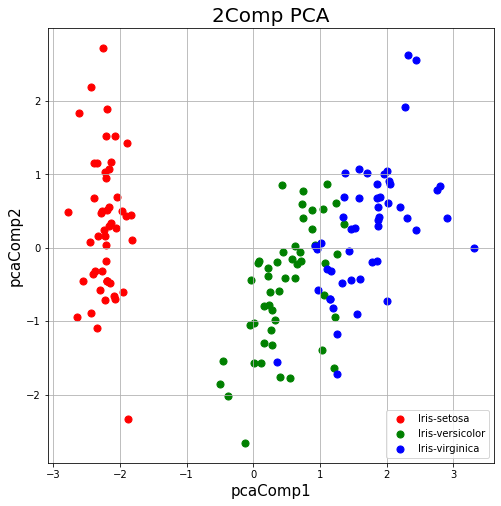

In [4]:
# 두개의 주성분을 이용햔 Iris species시각화
from matplotlib import pyplot as plt

final_df = pandas.concat([principal_df, iris[['target']]], axis=1)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('pcaComp1', fontsize=15)
ax.set_ylabel('pcaComp2', fontsize=15)
ax.set_title('2Comp PCA', fontsize=20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

colors = ['r','g','b']
for target, color in zip(targets, colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'pcaComp1']
            , final_df.loc[indicesToKeep, 'pcaComp2']
            , c = color
            , s = 50)
ax.legend(targets)
ax.grid()

#### 어떤 이유를 근거로 주성분을 2개로 결정하는가?  

<img src="https://mblogthumb-phinf.pstatic.net/MjAxOTExMjdfNjQg/MDAxNTc0ODQ1Nzg2MjMx.vHpiC4Tqt0UH09gfdJ2bCQtBqmxJ-sX2pNlYidz-ZQEg.fQyb9VSVkvnbuMT_So2fOSkbtU9OEO6ck8h20LfH0NMg.PNG.tjdrud1323/image.png?type=w800" data-lazy-src="" data-width="450" data-height="364" alt="" class="se-image-resource _lazy-loading-target-image" id="img_8" data-top="7877.7236328125">
<img src="https://mblogthumb-phinf.pstatic.net/MjAxOTExMjdfMzAw/MDAxNTc0ODQ5OTQ4ODc2.o5UQM1igQqD5NrOBXH8ePAR6uIFp4uM5J-1jA49-db0g.zc3ow6UBEzOcMJHubEhfCMpDoRwYaiPJDJMCnFclY6sg.PNG.tjdrud1323/image.png?type=w800" data-lazy-src="" data-width="575" data-height="460" alt="" class="se-image-resource _lazy-loading-target-image" id="img_9" data-top="7877.7236328125">

- PCA를 단계적으로 진행할 경우, 공분산 행렬을 통해 고유값과 고유벡터를 구할 수 있는데, 이때의 고유값이 설명 가능한 분산량에 해당한다. 
- 위 그래프는 주성분 각각의 고윳값들이 원래 데이터를 설명한 비율을 나타내는 그래프이다.
- 그래프 대로 해석을 하자면 주성분이 6개일 때, 누적 설명 분산량이 73%이기 때문에 주성분을 6개로 결정하였다라고 결론 지을 수 있는 것이다.


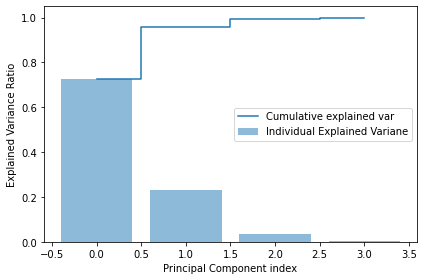

In [17]:
# Explained Variance 
from numpy.linalg import eigh

# Determine covariance Matrix
cov_matrix = numpy.cov(x, rowvar=False)

# Determine eigenvalues and eigenvectors
egnvalues, egnvectors = eigh(cov_matrix)

# Determine Explained Variance
total_egnvalues = sum(egnvalues)
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]

# plot the explained variance against cumulative explained variance
import matplotlib.pyplot as plt

cum_sum_exp = numpy.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label = 'Individual Explained Variane')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where ='mid', label='Cumulative explained var')
plt.ylabel('Explained Variance Ratio')
plt.xlabel("Principal Component index")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 결과를 통해 
# 2개의 PCA Component가 Raw 데이터 분산설명량의 90%를 차지하고있다
# PCA의 component 개수는 2개가 적절하다.

